In [123]:
#headers

import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pylab

In [124]:
source = pd.read_csv("pima-indians-diabetes.csv", names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'])

df = source.drop('Class', axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [125]:
x=df.values[:,:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

In [126]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

In [127]:
z_complete = hierarchy.linkage(D,'complete')
max_d = 2
clusters = fcluster(z_complete,max_d,criterion="maxclust")
clusters


array([1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [128]:
fig = pylab.figure(figsize=(20,500))

dendro = hierarchy.dendrogram(z_complete,leaf_rotation=0,leaf_font_size=12,orientation = 'right')

# print(f'Silhouette Score(n=2): {silhouette_score(z_complete, df.labels_)}')

AttributeError: 'DataFrame' object has no attribute 'labels_'

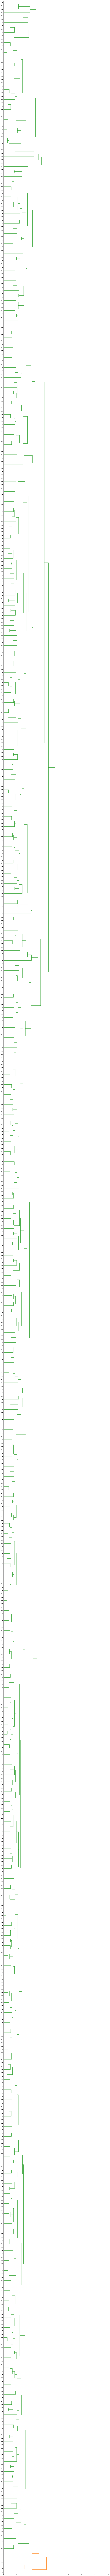

In [111]:
z_average = hierarchy.linkage(D,'average')
max_d = 2
clusters = fcluster(z_average,max_d,criterion="maxclust")
clusters
fig = pylab.figure(figsize=(20,500))

dendro = hierarchy.dendrogram(z_average,leaf_rotation=0,leaf_font_size=12,orientation = 'right')

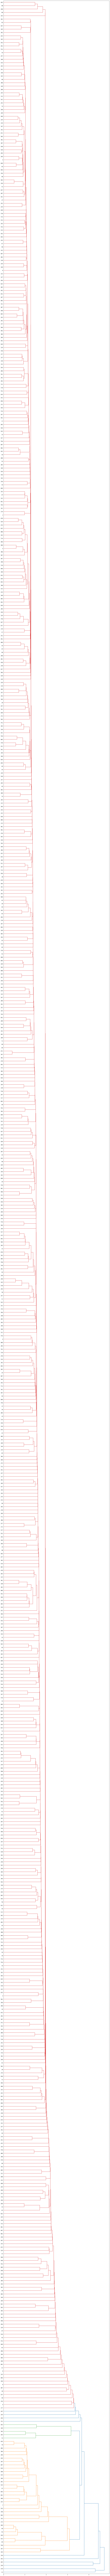

In [113]:
z_single = hierarchy.linkage(D,'single')
max_d = 2
clusters = fcluster(z_single,max_d,criterion="maxclust")
clusters
fig = pylab.figure(figsize=(20,500))

dendro = hierarchy.dendrogram(z_single,leaf_rotation=0,leaf_font_size=12,orientation = 'right')

In [115]:
# dist_matrix = distance_matrix(feature_mtx,feature_mtx)
# print (dist_matrix)

# agglom = AgglomerativeClustering(n_clusters=2,linkage='complete')
# agglom.fit(feature_mtx)
# agglom.labels_


[[0.         0.56380025 0.53665043 ... 0.45162548 0.50269284 0.62234648]
 [0.56380025 0.         0.7208524  ... 0.33774235 0.45222484 0.15595016]
 [0.53665043 0.7208524  0.         ... 0.4901339  0.58690672 0.72903545]
 ...
 [0.45162548 0.33774235 0.4901339  ... 0.         0.47201476 0.34337787]
 [0.50269284 0.45222484 0.58690672 ... 0.47201476 0.         0.5408326 ]
 [0.62234648 0.15595016 0.72903545 ... 0.34337787 0.5408326  0.        ]]


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [117]:
# map_cluster = {0:'Non-Diabetic',1:'Diabetic'}
# source['Hierarchial_label'] = [map_cluster[x] for x in agglom.labels_]
# source['eq'] = np.where(source['Hierarchial_label'] == source["Class"],True,False)
# source['Cluster']  = agglom.labels_
# source

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Hierarchial_label,eq,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,Non-Diabetic,False,0
1,1,85,66,29,0,26.6,0.351,31,0,Non-Diabetic,False,0
2,8,183,64,0,0,23.3,0.672,32,1,Non-Diabetic,False,0
3,1,89,66,23,94,28.1,0.167,21,0,Non-Diabetic,False,0
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Non-Diabetic,False,0
764,2,122,70,27,0,36.8,0.340,27,0,Non-Diabetic,False,0
765,5,121,72,23,112,26.2,0.245,30,0,Non-Diabetic,False,0
766,1,126,60,0,0,30.1,0.349,47,1,Non-Diabetic,False,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'DiabetesPedigreeFunction')

<Figure size 1152x1008 with 0 Axes>

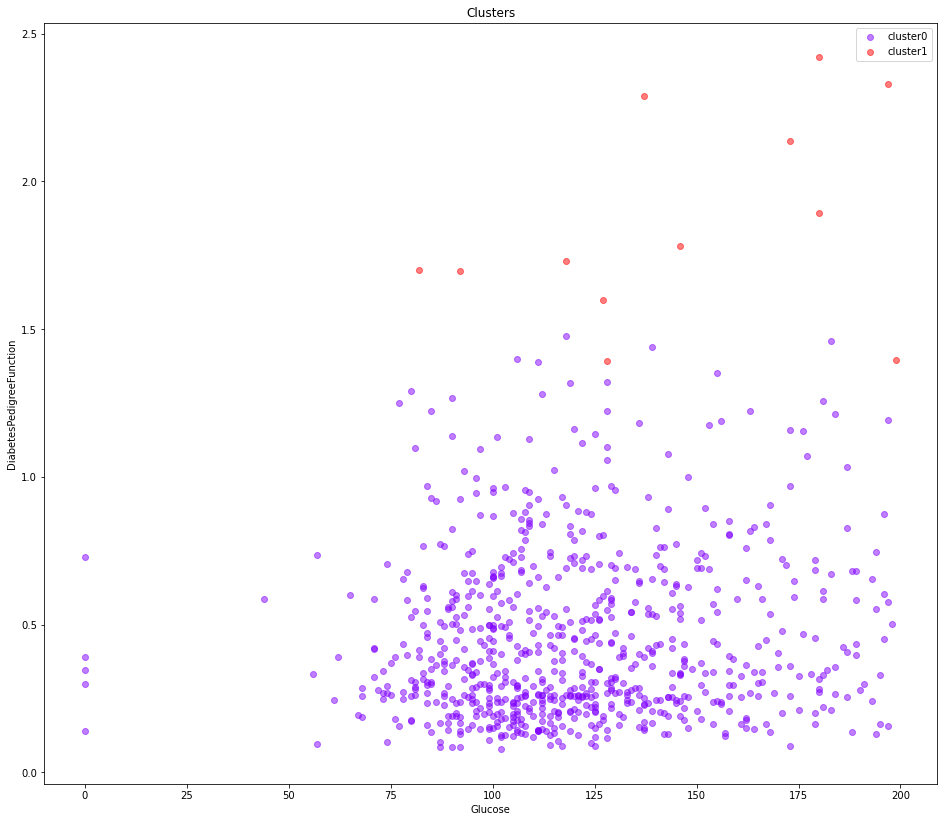

In [119]:
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16,14))

# n_clusters = max(agglom.labels_)+1
# colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# cluster_labels = list(range(0, n_clusters))

# # Create a figure of size 6 inches by 4 inches.
# plt.figure(figsize=(16,14))

# for color, label in zip(colors, cluster_labels):
#     subset = source[source.Cluster == label]
#     plt.scatter(subset.Glucose, subset.DiabetesPedigreeFunction, c=color, label='cluster'+str(label),alpha=0.5)


# plt.legend()
# plt.title('Clusters')
# plt.xlabel('Glucose')
# plt.ylabel('DiabetesPedigreeFunction')


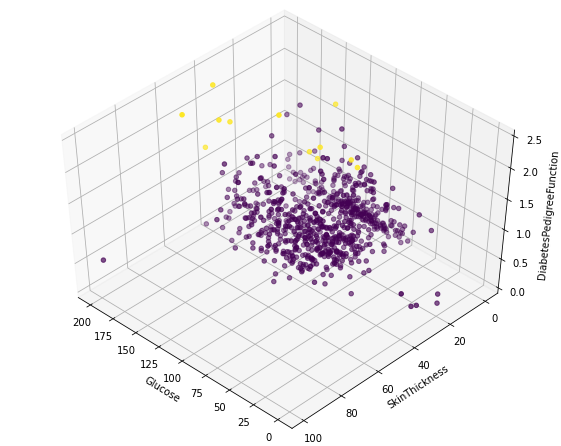

In [121]:
# fig = plt.figure(1, figsize=(8, 6))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plt.legend
# plt.cla()
# ax.set_xlabel('Glucose')
# ax.set_ylabel('SkinThickness')
# ax.set_zlabel('DiabetesPedigreeFunction')

# ax.scatter(x[:, 1], x[:, 3], x[:, 6], c= agglom.labels_.astype(np.float))